In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
filename = "data/ZarathustraSmall.txt"

In [3]:
raw_text = open(filename).read()
raw_text = raw_text.lower()

In [6]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
chars[1:50]

[' ',
 '!',
 '"',
 "'",
 ',',
 '-',
 '.',
 '1',
 '2',
 '8',
 '9',
 ':',
 ';',
 '?',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [7]:
char_to_int = dict((c, i) for i, c in enumerate(chars))
char_to_int

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 "'": 4,
 ',': 5,
 '-': 6,
 '.': 7,
 '1': 8,
 '2': 9,
 '8': 10,
 '9': 11,
 ':': 12,
 ';': 13,
 '?': 14,
 'a': 15,
 'b': 16,
 'c': 17,
 'd': 18,
 'e': 19,
 'f': 20,
 'g': 21,
 'h': 22,
 'i': 23,
 'j': 24,
 'k': 25,
 'l': 26,
 'm': 27,
 'n': 28,
 'o': 29,
 'p': 30,
 'q': 31,
 'r': 32,
 's': 33,
 't': 34,
 'u': 35,
 'v': 36,
 'w': 37,
 'x': 38,
 'y': 39,
 'z': 40}

In [8]:
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  3964
Total Vocab:  41


In [9]:
# prepare the dataset of input to output pairs encoded as integers
zz=[[char_to_int[char] for char in raw_text[3320:3520]]]
len(zz)

1

In [10]:
zz

[[15,
  26,
  27,
  33,
  5,
  1,
  15,
  28,
  18,
  1,
  26,
  19,
  34,
  1,
  34,
  22,
  19,
  27,
  1,
  15,
  26,
  33,
  29,
  1,
  16,
  19,
  21,
  1,
  20,
  29,
  32,
  1,
  23,
  34,
  2,
  3,
  1,
  1,
  1,
  3,
  28,
  29,
  5,
  3,
  1,
  32,
  19,
  30,
  26,
  23,
  19,
  18,
  1,
  40,
  15,
  32,
  15,
  34,
  22,
  35,
  33,
  34,
  32,
  15,
  5,
  1,
  3,
  23,
  1,
  21,
  23,
  36,
  19,
  1,
  28,
  29,
  1,
  15,
  26,
  27,
  33,
  7,
  1,
  23,
  1,
  15,
  27,
  1,
  28,
  29,
  34,
  1,
  30,
  29,
  29,
  32,
  1,
  19,
  28,
  29,
  35,
  21,
  22,
  1,
  20,
  29,
  32,
  1,
  34,
  22,
  15,
  34,
  7,
  3,
  1,
  1,
  1,
  34,
  22,
  19,
  1,
  33,
  15,
  23,
  28,
  34,
  1,
  26,
  15,
  35,
  21,
  22,
  19,
  18,
  1,
  15,
  34,
  1,
  40,
  15,
  32,
  15,
  34,
  22,
  35,
  33,
  34,
  32,
  15,
  5,
  1,
  15,
  28,
  18,
  1,
  33,
  30,
  15,
  25,
  19,
  1,
  34,
  22,
  35,
  33,
  12,
  1,
  3,
  34,
  22,
  19,
  28,
  1,
  33,
  19

In [11]:
x_train=np.array(zz)
x_train = x_train.astype('float32')
x_train=x_train/float(n_vocab)
x_train

array([[0.36585367, 0.63414633, 0.6585366 , 0.80487806, 0.12195122,
        0.02439024, 0.36585367, 0.68292683, 0.4390244 , 0.02439024,
        0.63414633, 0.46341464, 0.8292683 , 0.02439024, 0.8292683 ,
        0.5365854 , 0.46341464, 0.6585366 , 0.02439024, 0.36585367,
        0.63414633, 0.80487806, 0.70731705, 0.02439024, 0.3902439 ,
        0.46341464, 0.5121951 , 0.02439024, 0.4878049 , 0.70731705,
        0.7804878 , 0.02439024, 0.5609756 , 0.8292683 , 0.04878049,
        0.07317073, 0.02439024, 0.02439024, 0.02439024, 0.07317073,
        0.68292683, 0.70731705, 0.12195122, 0.07317073, 0.02439024,
        0.7804878 , 0.46341464, 0.73170733, 0.63414633, 0.5609756 ,
        0.46341464, 0.4390244 , 0.02439024, 0.9756098 , 0.36585367,
        0.7804878 , 0.36585367, 0.8292683 , 0.5365854 , 0.85365856,
        0.80487806, 0.8292683 , 0.7804878 , 0.36585367, 0.12195122,
        0.02439024, 0.07317073, 0.5609756 , 0.02439024, 0.5121951 ,
        0.5609756 , 0.8780488 , 0.46341464, 0.02

In [12]:
encoding_dim = 3
input_img = Input(shape=(200,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(200, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [16]:
filepath="data/auto/autoencoder-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='binary_crossentropy', verbose=1, save_best_only=False)

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
_________________________________________________________________
dense_2 (Dense)              (None, 200)               800       
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


In [17]:
autoencoder.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=16,
                shuffle=True,
                validation_data=(x_train, x_train),callbacks=[checkpoint],verbose=0)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 00000: saving model to data/auto/autoencoder-0.6817.hdf5
Epoch 00001: saving model to data/auto/autoencoder-0.6816.hdf5
Epoch 00002: saving model to data/auto/autoencoder-0.6815.hdf5
Epoch 00003: saving model to data/auto/autoencoder-0.6814.hdf5
Epoch 00004: saving model to data/auto/autoencoder-0.6813.hdf5
Epoch 00005: saving model to data/auto/autoencoder-0.6812.hdf5
Epoch 00006: saving model to data/auto/autoencoder-0.6810.hdf5
Epoch 00007: saving model to data/auto/autoencoder-0.6809.hdf5
Epoch 00008: saving model to data/auto/autoencoder-0.6808.hdf5
Epoch 00009: saving model to data/auto/autoencoder-0.6807.hdf5
Epoch 00010: saving model to data/auto/autoencoder-0.6806.hdf5
Epoch 00011: saving model to data/auto/autoencoder-0.6805.hdf5
Epoch 00012: saving model to data/auto/autoencoder-0.6803.hdf5
Epoch 00013: saving model to data/auto/autoencoder-0.6802.hdf5
Epoch 00014: saving model to data/auto/autoencoder-0.6801.hdf5
Epoch 00015: saving model to data/auto/autoencoder-0.68

In [19]:
filename = "data/auto/autoencoder-0.6702.hdf5"
autoencoder.load_weights(filename)
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

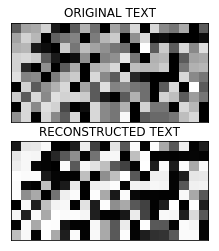

In [21]:
n = 1  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(10, 20))
    plt.title("ORIGINAL TEXT")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(10, 20))
    plt.title("RECONSTRUCTED TEXT")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
print("Accuracy=",1-np.mean(abs(x_train-decoded_imgs)),'\n')

Accuracy= 0.7656361758708954 



In [23]:
s=[]
int_to_char = dict((i, c) for i, c in enumerate(chars))

for i in range(0,x_train.shape[1]):
    result = int_to_char[round(x_train[0][i]*n_vocab)]
    s.append(result)
print("Message:",'\n',"\"", ''.join(s), "\"",'\n')

Message: 
 " alms, and let them also beg for it!"   "no," replied zarathustra, "i give no alms. i am not poor enough for that."   the saint laughed at zarathustra, and spake thus: "then see to it that they accept  " 



In [24]:
s1=[]
for i in range(0,x_train.shape[1]):
    result2 = int_to_char[round(decoded_imgs[0][i]*n_vocab)]
    s1.append(result2)
print("Decoded Message:",'\n',"\"", ''.join(s1), "\"")

Decoded Message: 
 " fgggeefgfegfgehgfgefgggeffgefggegheeeeeeggfeegfgggffehfgfhgghggfeeegegghfeggefgghfegefgeggheggggefgghggefggehgfgfeeeeggfegfgggegfhggffefhehfgfgghghgfeefgfeggfgfegghhfeeggfgehffeggeggehgfgeggfheffffgge "
